counter =  10000
counter =  20000


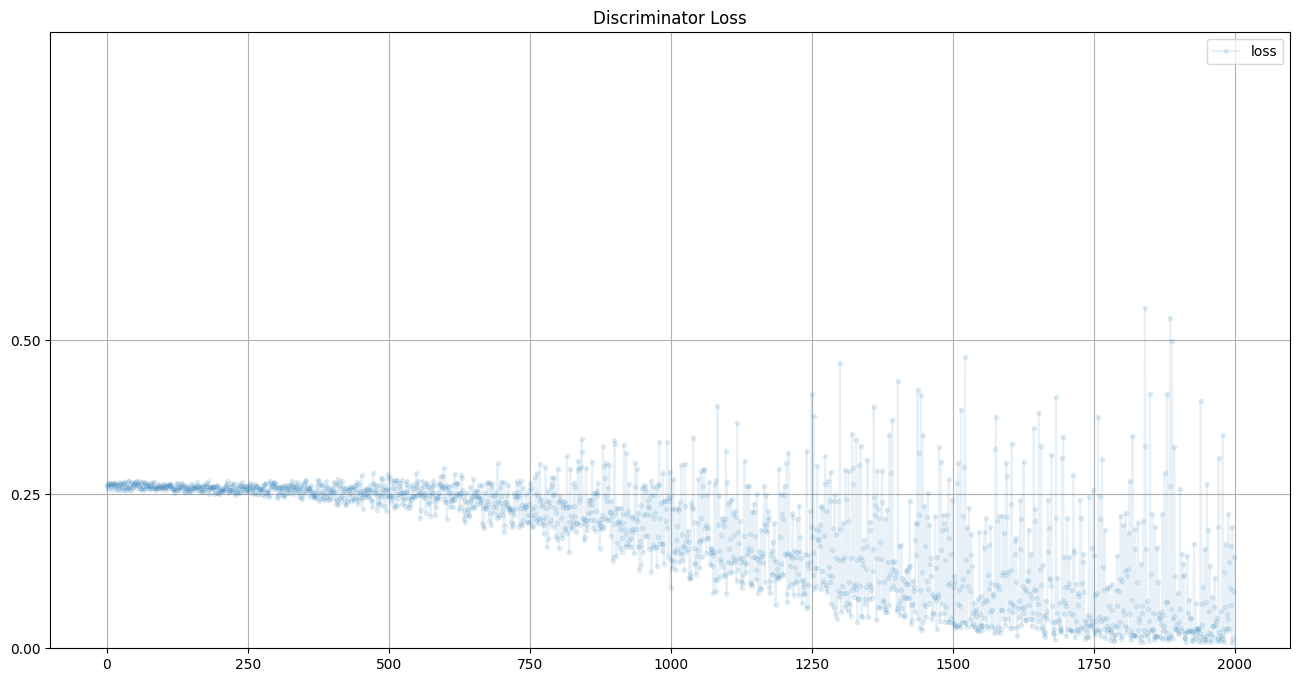

In [1]:
# import libraries

import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random
import numpy


def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

# 鉴别器类
class Discriminator(nn.Module):
    def __init__(self):
        # 初始化父类
        super().__init__()
        # 定义神经网络层
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        # 创建损失函数
        self.loss_function = nn.MSELoss()
        # 创建优化器，使用随机梯度下降
        self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
        # 计数器与进程记录
        self.counter = 0
        self.progress = []

    # 通过forward()函数调用上面的模型，输入数据并返回网络输出
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        # 计算网络的输出
        output = self.forward(inputs)

        # 计算损失值
        loss = self.loss_function(output, targets)

        # 每训练10次增加计数器
        self.counter += 1
        if (self.counter % 10 ==0):
            self.progress.append(loss.item())
        if (self.counter % 10000 ==0):
            print("counter = ", self.counter)
        
        # 梯度清零,反向传播，更新权重
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        plt.title("Discriminator Loss")


D = Discriminator()
for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))

D.plot_progress()